# Click Through Rate Prediction

In [132]:
# Import the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
# Read the dataset.
df = pd.read_csv('data.csv')

In [134]:
# Observe the first 5 rows.
df.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,2528,0,39,100075,221,10,1,28,14,0
1,True,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1934,2,39,-1,16,10,2,22,19,1
2,False,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,2552,3,167,100202,23,10,3,23,18,0
3,False,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,...,2478,3,167,100074,23,10,2,22,19,0
4,True,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1722,0,35,-1,79,10,1,21,8,1


In [135]:
# Observe the detailed information about the dataset columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  int64 
 2   banner_pos        99999 non-null  int64 
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  int64 
 15  C15               99999 non-null  int64 
 16  C16               99999 non-null  int64 
 17  C17         

In [136]:
# As we can clearly see there is a class imbalance. 
df['click'].value_counts(normalize = True)

False    0.830198
True     0.169802
Name: click, dtype: float64

# Data Cleaning

### Anonymized Categorical Variable analysis.
Now that the dataset is loaded, we will begin by observing our data. As we have a lot of anonyomized categorical variables, we do not have a context for their usefulness. We can analyze these variables and see if it is necessary to retain them.

In [137]:
# Anonymized Categorical Variable analysis. First we filter out the required data.
anon_categorical_cols = ['C1','C14','C15','C16','C20','C21']
anon_categorical_data = df[anon_categorical_cols]
anon_categorical_data.head()

,C1,C14,C15,C16,C20,C21
0,1005,22683,320,50,100075,221
1,1005,17037,320,50,-1,16
2,1005,22155,320,50,100202,23
3,1002,21591,320,50,100074,23
4,1005,15708,320,50,-1,79


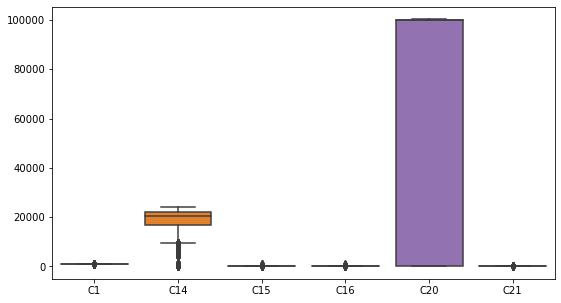

In [138]:
# We then plot a box plot to observe for outliers in the data.
plt.figure(figsize = (9,5))
sns.boxplot(data = anon_categorical_data)
plt.show()

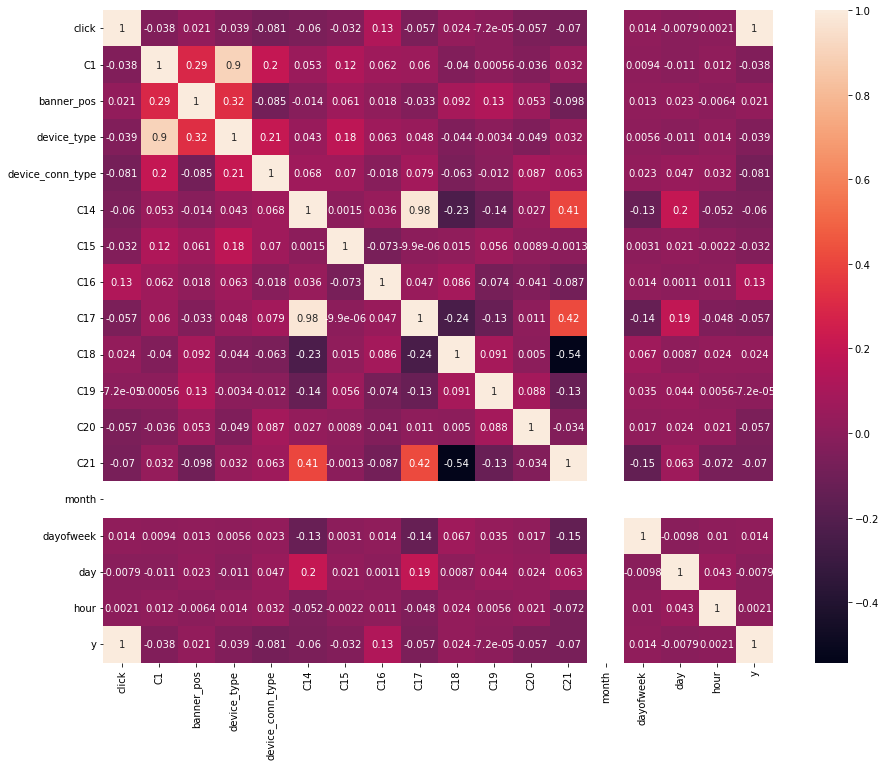

In [139]:
# We can also observe for any correlations using a heatmap.
f ,ax = plt.subplots(figsize=(15,12)) 
sns.heatmap(df.corr(), annot = True)
plt.show()

We see a lot of correlations between the variables. Specifically we can see the following.
1. <b>C14 has high correlation with C17 and C21.</b>
2. <b>C21 shows correlation with C17 and C18.</b>
3. <b>C1 with device_type and banner_pos.</b>

We also observe a few other factors with the categorical variables.
1. <b>Columns C15 and C16 have a lot of values in around 320 and 50.</b>
2. <b>Column C20 shows a lot of -1 values not usually seen with categorical variables.</b>

All these factors are good enough for us to drop these columns, which we have done below.

In [140]:
# Dropping the categorical columns.
df = df.drop(columns = anon_categorical_cols, axis = 1)
df.head()

,click,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,...,device_type,device_conn_type,C17,C18,C19,month,dayofweek,day,hour,y
0,False,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,962c8333,...,1,0,2528,0,39,10,1,28,14,0
1,True,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,5b1f94b9,...,1,0,1934,2,39,10,2,22,19,1
2,False,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,a9a84f4c,...,1,0,2552,3,167,10,3,23,18,0
3,False,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,88c62dad,...,0,0,2478,3,167,10,2,22,19,0
4,True,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,1e5e0d0e,...,1,0,1722,0,35,10,1,21,8,1


### Dropping unnecessary columns.
We also observe that the columns from site_id to device_model contain a lot of data that is not present in a useful format. We would need to deal with these columns. We can remove the <b>device_id</b>, <b>device_ip</b> columns as they don't contain useful information that is relevant to our problem.

In [141]:
irrelevant_cols = ['device_id', 'device_ip', 'month', 'click']
df = df.drop(columns = irrelevant_cols, axis = 1)
df.head()

,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_model,device_type,device_conn_type,C17,C18,C19,dayofweek,day,hour,y
0,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,be6db1d7,1,0,2528,0,39,1,28,14,0
1,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,1b13b020,1,0,1934,2,39,2,22,19,1
2,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,9a45a8e8,1,0,2552,3,167,3,23,18,0
3,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,ea6abc60,0,0,2478,3,167,2,22,19,0
4,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,36d749e5,1,0,1722,0,35,1,21,8,1


In [142]:
# Checking the no of unique values in the object type categorical columns.
print('SITE ID UNIQUE VALUE COUNT: ', len(df['site_id'].unique()))
print('SITE DOMAIN UNIQUE VALUE COUNT: ', len(df['site_domain'].unique()))
print('SITE CATEGORY UNIQUE VALUE COUNT: ', len(df['site_category'].unique()))
print('APP ID UNIQUE VALUE COUNT: ', len(df['app_id'].unique()))
print('APP DOMAIN UNIQUE VALUE COUNT: ', len(df['app_domain'].unique()))
print('APP CATEGORY UNIQUE VALUE COUNT: ', len(df['app_category'].unique()))
print('DEVICE MODEL UNIQUE VALUE COUNT: ', len(df['device_model'].unique()))

SITE ID UNIQUE VALUE COUNT:  1485
SITE DOMAIN UNIQUE VALUE COUNT:  1331
SITE CATEGORY UNIQUE VALUE COUNT:  19
APP ID UNIQUE VALUE COUNT:  1354
APP DOMAIN UNIQUE VALUE COUNT:  96
APP CATEGORY UNIQUE VALUE COUNT:  21
DEVICE MODEL UNIQUE VALUE COUNT:  3145


# Data Transformation

We have a lot of categorical data in our dataset. As we know that machine learning models need data in the form of numbers, we would have to do encoding for our data. We will proceed to do it below thereby preparing our dataset for modelling.

One thing we would need to consider is the no of features that we have. Given that we have a lot of features, one hot encoding becomes impractical as it increases the no of features immeasurably.

We will use it selectively and use Target encoding as well for our purposes here.

In [143]:
# Perform One Hot Encoding for Numeric Categorical Variables.
numeric_categorical_cols = ['banner_pos', 'device_type', 'device_conn_type']
df = pd.get_dummies(df, columns = numeric_categorical_cols)

In [144]:
df.columns

Index(['site_id', 'site_domain', 'site_category', 'app_id', 'app_domain',
       'app_category', 'device_model', 'C17', 'C18', 'C19', 'dayofweek', 'day',
       'hour', 'y', 'banner_pos_0', 'banner_pos_1', 'banner_pos_2',
       'banner_pos_3', 'banner_pos_4', 'banner_pos_5', 'banner_pos_7',
       'device_type_0', 'device_type_1', 'device_type_4', 'device_type_5',
       'device_conn_type_0', 'device_conn_type_2', 'device_conn_type_3',
       'device_conn_type_5'],
      dtype='object')

In [145]:
df.shape

(99999, 29)

In [146]:
! pip install category_encoders

In [147]:
from category_encoders import TargetEncoder

X = df.loc[:, df.columns != 'y']
y = df.loc[:, 'y']

target_encoder = TargetEncoder()
X = target_encoder.fit_transform(X, y)
X.head()

,site_id,site_domain,site_category,app_id,app_domain,app_category,device_model,C17,C18,C19,...,banner_pos_5,banner_pos_7,device_type_0,device_type_1,device_type_4,device_type_5,device_conn_type_0,device_conn_type_2,device_conn_type_3,device_conn_type_5
0,0.034043,0.034043,0.176707,0.197227,0.194074,0.198258,0.189474,2528,0,39,...,0,0,0,1,0,0,1,0,0,0
1,0.296498,0.258816,0.176707,0.197227,0.194074,0.198258,0.276074,1934,2,39,...,0,0,0,1,0,0,1,0,0,0
2,0.052133,0.034853,0.205942,0.197227,0.194074,0.198258,0.097858,2552,3,167,...,0,0,0,1,0,0,1,0,0,0
3,0.136212,0.138826,0.131223,0.197227,0.194074,0.198258,0.189147,2478,3,167,...,0,0,1,0,0,0,1,0,0,0
4,0.202875,0.202875,0.205942,0.197227,0.194074,0.198258,0.224832,1722,0,35,...,0,0,0,1,0,0,1,0,0,0


# Model Building
Now that we have prepared and cleaned the dataset, we can proceed to building models for performing the CTR prediction.
We have learnt three models that can potentially be used for classfication problems:
1. Logistic Regression
2. Decision Trees
3. Random Forests.

We can have a look at each of the approaches one by one below.

### Logistic Regression

In [148]:
# Importing the necessary functions from the Scikit-Learn Machine Learning Library.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the data into train and test sets. We have taken a 70:30 Train-Test split ratio.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Post splitting we will scale the data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [149]:
# Calculating a base line for comparing the model. 
from sklearn.dummy import DummyClassifier

In [150]:
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_test,y_test)

# We verify the baseline accuracy.
print("Baseline Accuracy = ", baseline_acc)

Baseline Accuracy =  0.8293333333333334


[[24880     0]
 [ 5120     0]]


/Users/dheeraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


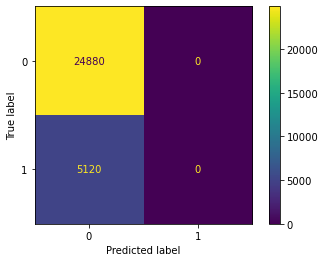

In [151]:
import sklearn.metrics as metrics

y_pred_base=dummy_classifier.predict(X_test)

# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_base)
print(cnf_matrix)
metrics.plot_confusion_matrix(dummy_classifier, X_test, y_test)
plt.show()

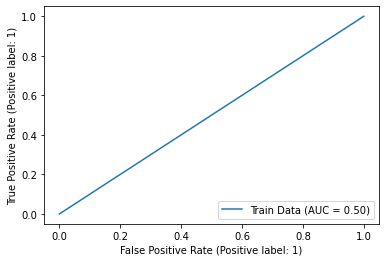

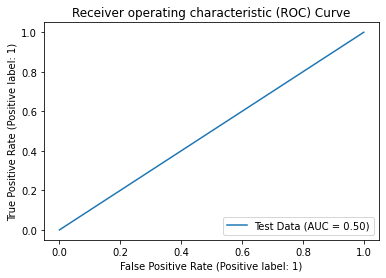

In [152]:
# Drawing the ROC Curve for the baseline. We will see that the line is the worst possible line.
from sklearn.metrics import RocCurveDisplay

roc_train = RocCurveDisplay.from_estimator(dummy_classifier, X_train, y_train, name='Train Data')
roc_test = RocCurveDisplay.from_estimator(dummy_classifier, X_test, y_test, name='Test Data')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [153]:
# Declare the model.
logistic_regression = LogisticRegression()

# Fit the model on the training data.
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [154]:
# Get the Beta values for all the independent variables.
logistic_regression.coef_

array([[ 4.24130275e-01,  1.74337777e-01, -2.79497533e-02,
         7.67172106e-01, -1.71426811e-01, -2.63196494e-01,
         3.68261614e-01, -7.34928728e-02, -4.97294924e-02,
         5.16686832e-02,  4.15007584e-03, -8.30184968e-03,
        -2.80747527e-02, -2.65478751e-02,  3.18420033e-02,
        -2.02776344e-02,  1.47889985e-02, -1.14593232e-01,
        -7.06873854e-02,  1.00131154e-02, -1.79552027e-02,
        -4.09038371e-03,  2.84618819e-02,  2.07543735e-02,
        -2.77622345e-02,  1.20865323e-04,  4.26329719e-02,
        -6.00578807e-03]])

In [155]:
# Test the predictions of the model by predicting the values using the data.
from sklearn import metrics
y_pred = logistic_regression.predict(X_test)
print(f'ACCURACY SCORE: {metrics.accuracy_score(y_test, y_pred)}')

ACCURACY SCORE: 0.8332333333333334


# Model Evaluation
Now that the Logistic Regression model is built, and we have checked the accuracy, we can plot the confusion matrix and proceed to evaluate the model. We can also test for the ability of the model to classify by plotting the ROC Curve.

CONFUSION MATRIX: [[24473   407]
 [ 4596   524]]


/Users/dheeraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 648x360 with 0 Axes>

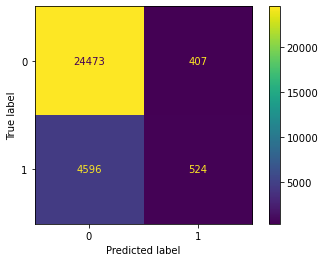

In [156]:
# Plot and print the confusion matrix.
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(f'CONFUSION MATRIX: {cnf_matrix}')
plt.figure(figsize = (9,5))
metrics.plot_confusion_matrix(logistic_regression, X_test, y_test)
plt.show()

In [157]:
# Calculate the Area under the ROC Curve.
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, logistic_regression.predict_proba(X_test)[:, 1])

0.7487505338122991

## Decision Trees

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [159]:
# Create a Decision Tree
model_dt = DecisionTreeClassifier()

In [160]:
# View the attributes of tree created
model_dt

DecisionTreeClassifier()

In [161]:
# Fit the training data
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [162]:
# Predict based on test data
y_preds_DT = model_dt.predict(X_test)

In [163]:
# View the predictions
y_preds_DT

array([0, 1, 0, ..., 1, 0, 0])

In [164]:
# Calculate Accuracy
accuracy_value_DT = metrics.accuracy_score(y_test,y_preds_DT)

In [165]:
# View the accuracy
accuracy_value_DT

0.7636

In [166]:
# Create and print confusion matrix
confusion_matrix(y_test,y_preds_DT)

array([[21415,  3465],
       [ 3627,  1493]])

/Users/dheeraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


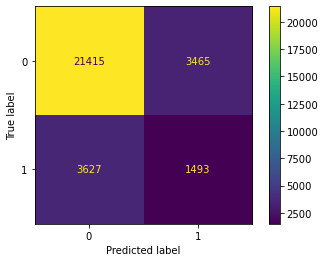

In [167]:
metrics.plot_confusion_matrix(model_dt, X_test, y_test)

/Users/dheeraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


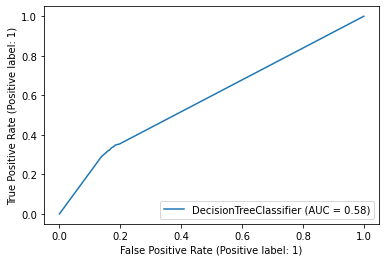

In [168]:
metrics.plot_roc_curve(model_dt, X_test, y_test) 
plt.show()

In [169]:
# Calculate the number of nodes in the tree
model_dt.tree_.node_count

31507

## Grid Search - Tree Optimisation.

In [170]:
from sklearn.model_selection import GridSearchCV

In [171]:
# parameters to build the model on
param_grid = {
    'max_depth': range(5, 20, 5),
    'min_samples_leaf': range(50, 200, 50),
    'min_samples_split': range(50, 200, 50),
    'criterion': ["entropy", "gini"],
    'splitter' : ["best", "random"]
}

In [172]:
# instantiate the model
dt_grid = DecisionTreeClassifier(random_state = 42)

# fit tree on training data
gridsearch_DT = GridSearchCV(estimator = dt_grid, param_grid = param_grid, cv = 5, n_jobs=-1, verbose=True)

In [173]:
# fit tree on training data
gridsearch_DT.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 20, 5),
                         'min_samples_leaf': range(50, 200, 50),
                         'min_samples_split': range(50, 200, 50),
                         'splitter': ['best', 'random']},
             verbose=True)

In [174]:
gridsearch_DT.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 150,
 'min_samples_split': 50,
 'splitter': 'best'}

In [175]:
gridsearch_DT.best_score_

0.835797651873093

In [176]:
# Visualise the tree
best_grid = gridsearch_DT.best_estimator_

In [177]:
best_grid

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=150,
                       min_samples_split=50, random_state=42)

In [178]:
best_grid.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=150,
                       min_samples_split=50, random_state=42)

In [179]:
best_grid.score(X_test,y_test )

0.8348666666666666

In [180]:
!pip install pydotplus
!pip install graphviz

[Text(0.6424062126745682, 0.96875, 'X[0] <= 0.062\nentropy = 0.656\nsamples = 69999\nvalue = [58139, 11860]'),
 Text(0.40684936029952223, 0.90625, 'X[3] <= 0.402\nentropy = 0.481\nsamples = 43368\nvalue = [38860, 4508]'),
 Text(0.2456171329474458, 0.84375, 'X[6] <= 0.129\nentropy = 0.392\nsamples = 38036\nvalue = [35103, 2933]'),
 Text(0.10040828280044102, 0.78125, 'X[3] <= -1.747\nentropy = 0.304\nsamples = 24748\nvalue = [23404, 1344]'),
 Text(0.041345093715545754, 0.71875, 'X[3] <= -2.114\nentropy = 0.184\nsamples = 7231\nvalue = [7029, 202]'),
 Text(0.01800808526277104, 0.65625, 'X[12] <= -0.807\nentropy = 0.14\nsamples = 4040\nvalue = [3960, 80]'),
 Text(0.012127894156560088, 0.59375, 'X[6] <= -1.808\nentropy = 0.026\nsamples = 394\nvalue = [393, 1]'),
 Text(0.009187798603454611, 0.53125, 'entropy = 0.058\nsamples = 150\nvalue = [149, 1]'),
 Text(0.015067989709665565, 0.53125, 'entropy = 0.0\nsamples = 244\nvalue = [244, 0]'),
 Text(0.02388827636898199, 0.59375, 'X[3] <= -2.45\nen

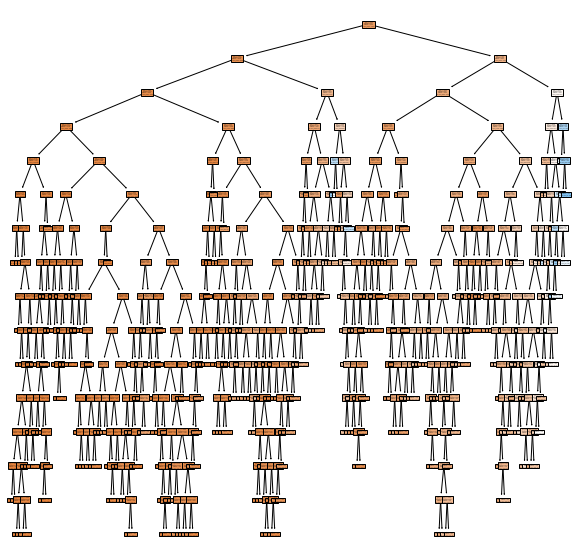

In [181]:
# Plot the tree.
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(best_grid, filled=True)

## Random Forests

Now we are going to try and see the RF Model and see that the accuracy improves.

In [182]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)

model_rf = RandomForestClassifier(n_estimators=10, max_features=7, random_state=42)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
recall_rf = recall_score(y_test, predict_rf)
precision_rf = precision_score(y_test, predict_rf)

In [183]:
print('Classification Report:\n')
print(classification_report(y_test, predict_rf))

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     24880
           1       0.38      0.20      0.26      5120

    accuracy                           0.81     30000
   macro avg       0.61      0.57      0.58     30000
weighted avg       0.77      0.81      0.78     30000



/Users/dheeraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


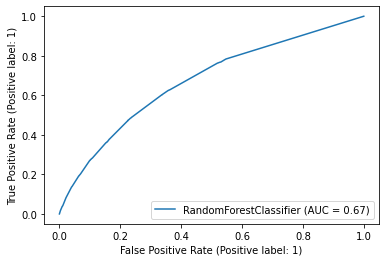

In [184]:
metrics.plot_roc_curve(model_rf, X_test, y_test) 
plt.show()

In [185]:
from sklearn.ensemble import RandomForestClassifier

model_rf_oob = RandomForestClassifier(n_estimators=100, max_features=7, oob_score=True, random_state=42).fit(X_train, y_train)
oob_score = round(model_rf_oob.oob_score_,4)
acc_oob = round(accuracy_score(y_test, model_rf_oob.predict(X_test)),4)
diff_oob = round(abs(oob_score - acc_oob),4)

print('OOB Score:\t\t\t', oob_score)
print('Testing Accuracy:\t\t', acc_oob)
print('Acc. Difference:\t\t', diff_oob)

OOB Score:			 0.8062
Testing Accuracy:		 0.8094
Acc. Difference:		 0.0032
